# Data Viz

In [1]:
# If you have installation questions, please reach out
import seaborn as sns
import pandas as pd # data storage
import catboost as cats # graident boosting 

from catboost import CatBoostRegressor, Pool

import numpy as np  # math and stuff
import matplotlib.pyplot as plt # plotting utility
import sklearn # ML and stats

print('catboost ver:', cats.__version__)
print('scikit ver:', sklearn.__version__)

import datetime

from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import max_error, mean_squared_error, median_absolute_error

catboost ver: 0.26.1
scikit ver: 1.0.1


# Data

In [2]:
df0  = pd.read_csv('../core_to_wl_merge/OS0_Merged_dataset_imputed_08_23_2021.csv')

df1 = pd.read_csv('../core_to_wl_merge/OS1_Merged_dataset_imputed_08_23_2021.csv')

df2 = pd.read_csv('../core_to_wl_merge/OS2_Merged_dataset_imputed_08_23_2021.csv')

C:\Users\tmartin\.conda\envs\lewisml\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Parameters

In [3]:

df_F028 = df1[df1.USGS_ID == 'F028']
df_F028

,Unnamed: 0,depth_ft,USGS_ID,CAL,GR,DT,SP,DENS,PE,RESD,...,Cu,Cu Err,Zn,Zn Err,Ba,Ba Err,ScanTime1,LiveTime1,ScanTime2,LiveTime2
0,0,7741.0,F028,0.598388,0.139541,0.062974,0.578901,0.834201,0.355534,1.817681,...,0.0,0.0008,0.0023,0.0008,0.0663,0.0049,60.0,41.48,-1.0,-1.0
1,1,7741.1,F028,0.599032,0.140214,0.064365,0.578108,0.833761,0.354277,1.792578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,7741.2,F028,0.599694,0.141007,0.065247,0.577456,0.833524,0.352951,1.770195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,7741.3,F028,0.600342,0.141384,0.064707,0.576524,0.833115,0.351924,1.745634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,7741.4,F028,0.600995,0.142250,0.064707,0.576234,0.832757,0.350847,1.723410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,1156,7856.6,F028,0.560265,0.616838,0.044415,0.790311,0.904644,0.523820,-0.361890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1157,1157,7856.7,F028,0.563678,0.604201,0.031180,0.792947,0.907205,0.503794,-0.316071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1158,1158,7856.8,F028,0.567674,0.594540,0.029348,0.795482,0.909673,0.486140,-0.267355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1159,1159,7856.9,F028,0.571205,0.589461,0.028157,0.798122,0.911430,0.469641,-0.215558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_F028 = df_F028[df_F028.depth_ft.between(7822.5, 7829.0)]

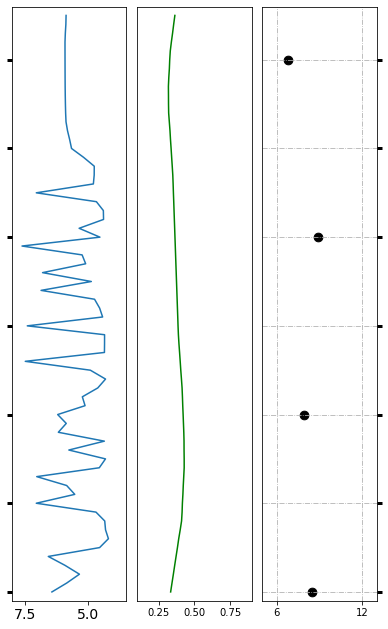

In [17]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(5.5, 8.845))

## ax1 ###
ax1.plot(
    df_F028.gz_pchip_interp.values,
    df_F028.depth_ft.values
    )


ax1.tick_params(axis='both', which='major', labelsize=14)
#ax.tick_params(axis='both', which='minor', labelsize=8)

ax1.yaxis.set_ticklabels([])

ax1.tick_params('y', length=5, width=3, which='major')

ax1.set_ylim([7822.4, 7829.1])
ax1.margins(y=0)

ax1.invert_yaxis()
ax1.invert_xaxis()

ax1.set_xlim([8, 3.5])

# ax1.set_title('Grainsize (ϕ)', size=14)

## ax2 ##

ax2.plot(
    df_F028.GR.values,
    df_F028.depth_ft.values,
    color = 'green'
    )

ax2.set_xlim([0.1, 0.9])
# ax2.set_title('GR', size=14)
ax2.tick_params('y', length=0, width=0, which='major')

## ax3 ##

ax3.scatter(
    df_F028.por_percent.values,
    df_F028.depth_ft.values,
    label='Porosity (%)',
    s=75,
    color='black'
    )

ax3.set_xlim([5, 13])

# ax3.set_title('Porosity (%)', size=14)

ax3.grid(True, linestyle = "-.")
ax3.set_xticks([6,  12])




ax3.tick_params('y', length=5, width=3, which='major')
#ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()

## figure exporting ##
plt.tight_layout()
plt.savefig('test3.pdf', dpi=400, transparent=True)